In [2]:
# Import libraries
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from extern.guided_diffusion.guided_diffusion import gaussian_diffusion as gd

In [7]:
IMAGE_PATH = "imgs/golden_retriever.jpg" 

In [10]:
# Read the image and convert BGR to RGB
image = Image.open(IMAGE_PATH)

# Create a transformation composition to resize the image to a 64x64 image,
# and convert it to a torch Tensor.
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.PILToTensor()
])

img_t = transform(image)

Original (256, 256) image:


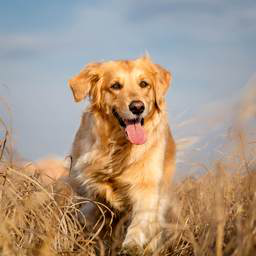

Transformed 3x64x64 image:


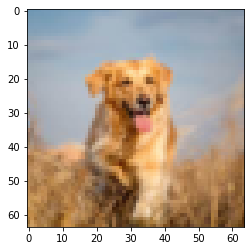

In [18]:
# Plot the chosen original image:
print(f'Original {image.size} image:')
display(image)

print(f'Transformed {"x".join([str(n) for n in img_t.shape])} image:')
plt.imshow(img_t.permute(1, 2, 0))
plt.show()